In [1]:
import torch
from kan import *
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import moviepy.video.io.ImageSequenceClip

if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

print(device)

cpu


In [4]:
iris = load_iris()
input_features = iris.data
target = iris.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(torch.tensor(input_features), torch.tensor(target), 
                                                                    test_size=0.2, stratify=target,random_state=42)

In [7]:
train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_train, y_train), batch_size=1, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_test, y_test), batch_size=1, shuffle=False)

In [8]:
train_inputs = torch.empty(len(train_loader), 4, device=device)
train_labels = torch.empty(len(train_loader), dtype=torch.long, device=device)
test_inputs = torch.empty(len(test_loader), 4, device=device)
test_labels = torch.empty(len(test_loader), dtype=torch.long, device=device)

# Fill tensors with data
for i, (data, labels) in enumerate(train_loader):
    train_inputs[i] = data.squeeze(0).to(device)
    train_labels[i] = labels.to(device)

for i, (data, labels) in enumerate(test_loader):
    test_inputs[i] = data.squeeze(0).to(device)
    test_labels[i] = labels.to(device)

dataset = {
    'train_input': train_inputs,
    'test_input': test_inputs,
    'train_label': train_labels,
    'test_label': test_labels
}

In [37]:
print('feature ->', iris.feature_names)
print('classes ->', iris.target_names)

# Changing name as it don't yet have function to set font size
features = ['s len', 's wdt', 'p len', 'p wdt']
classes = ['Set', 'Ver', 'Vir']

feature -> ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
classes -> ['setosa' 'versicolor' 'virginica']


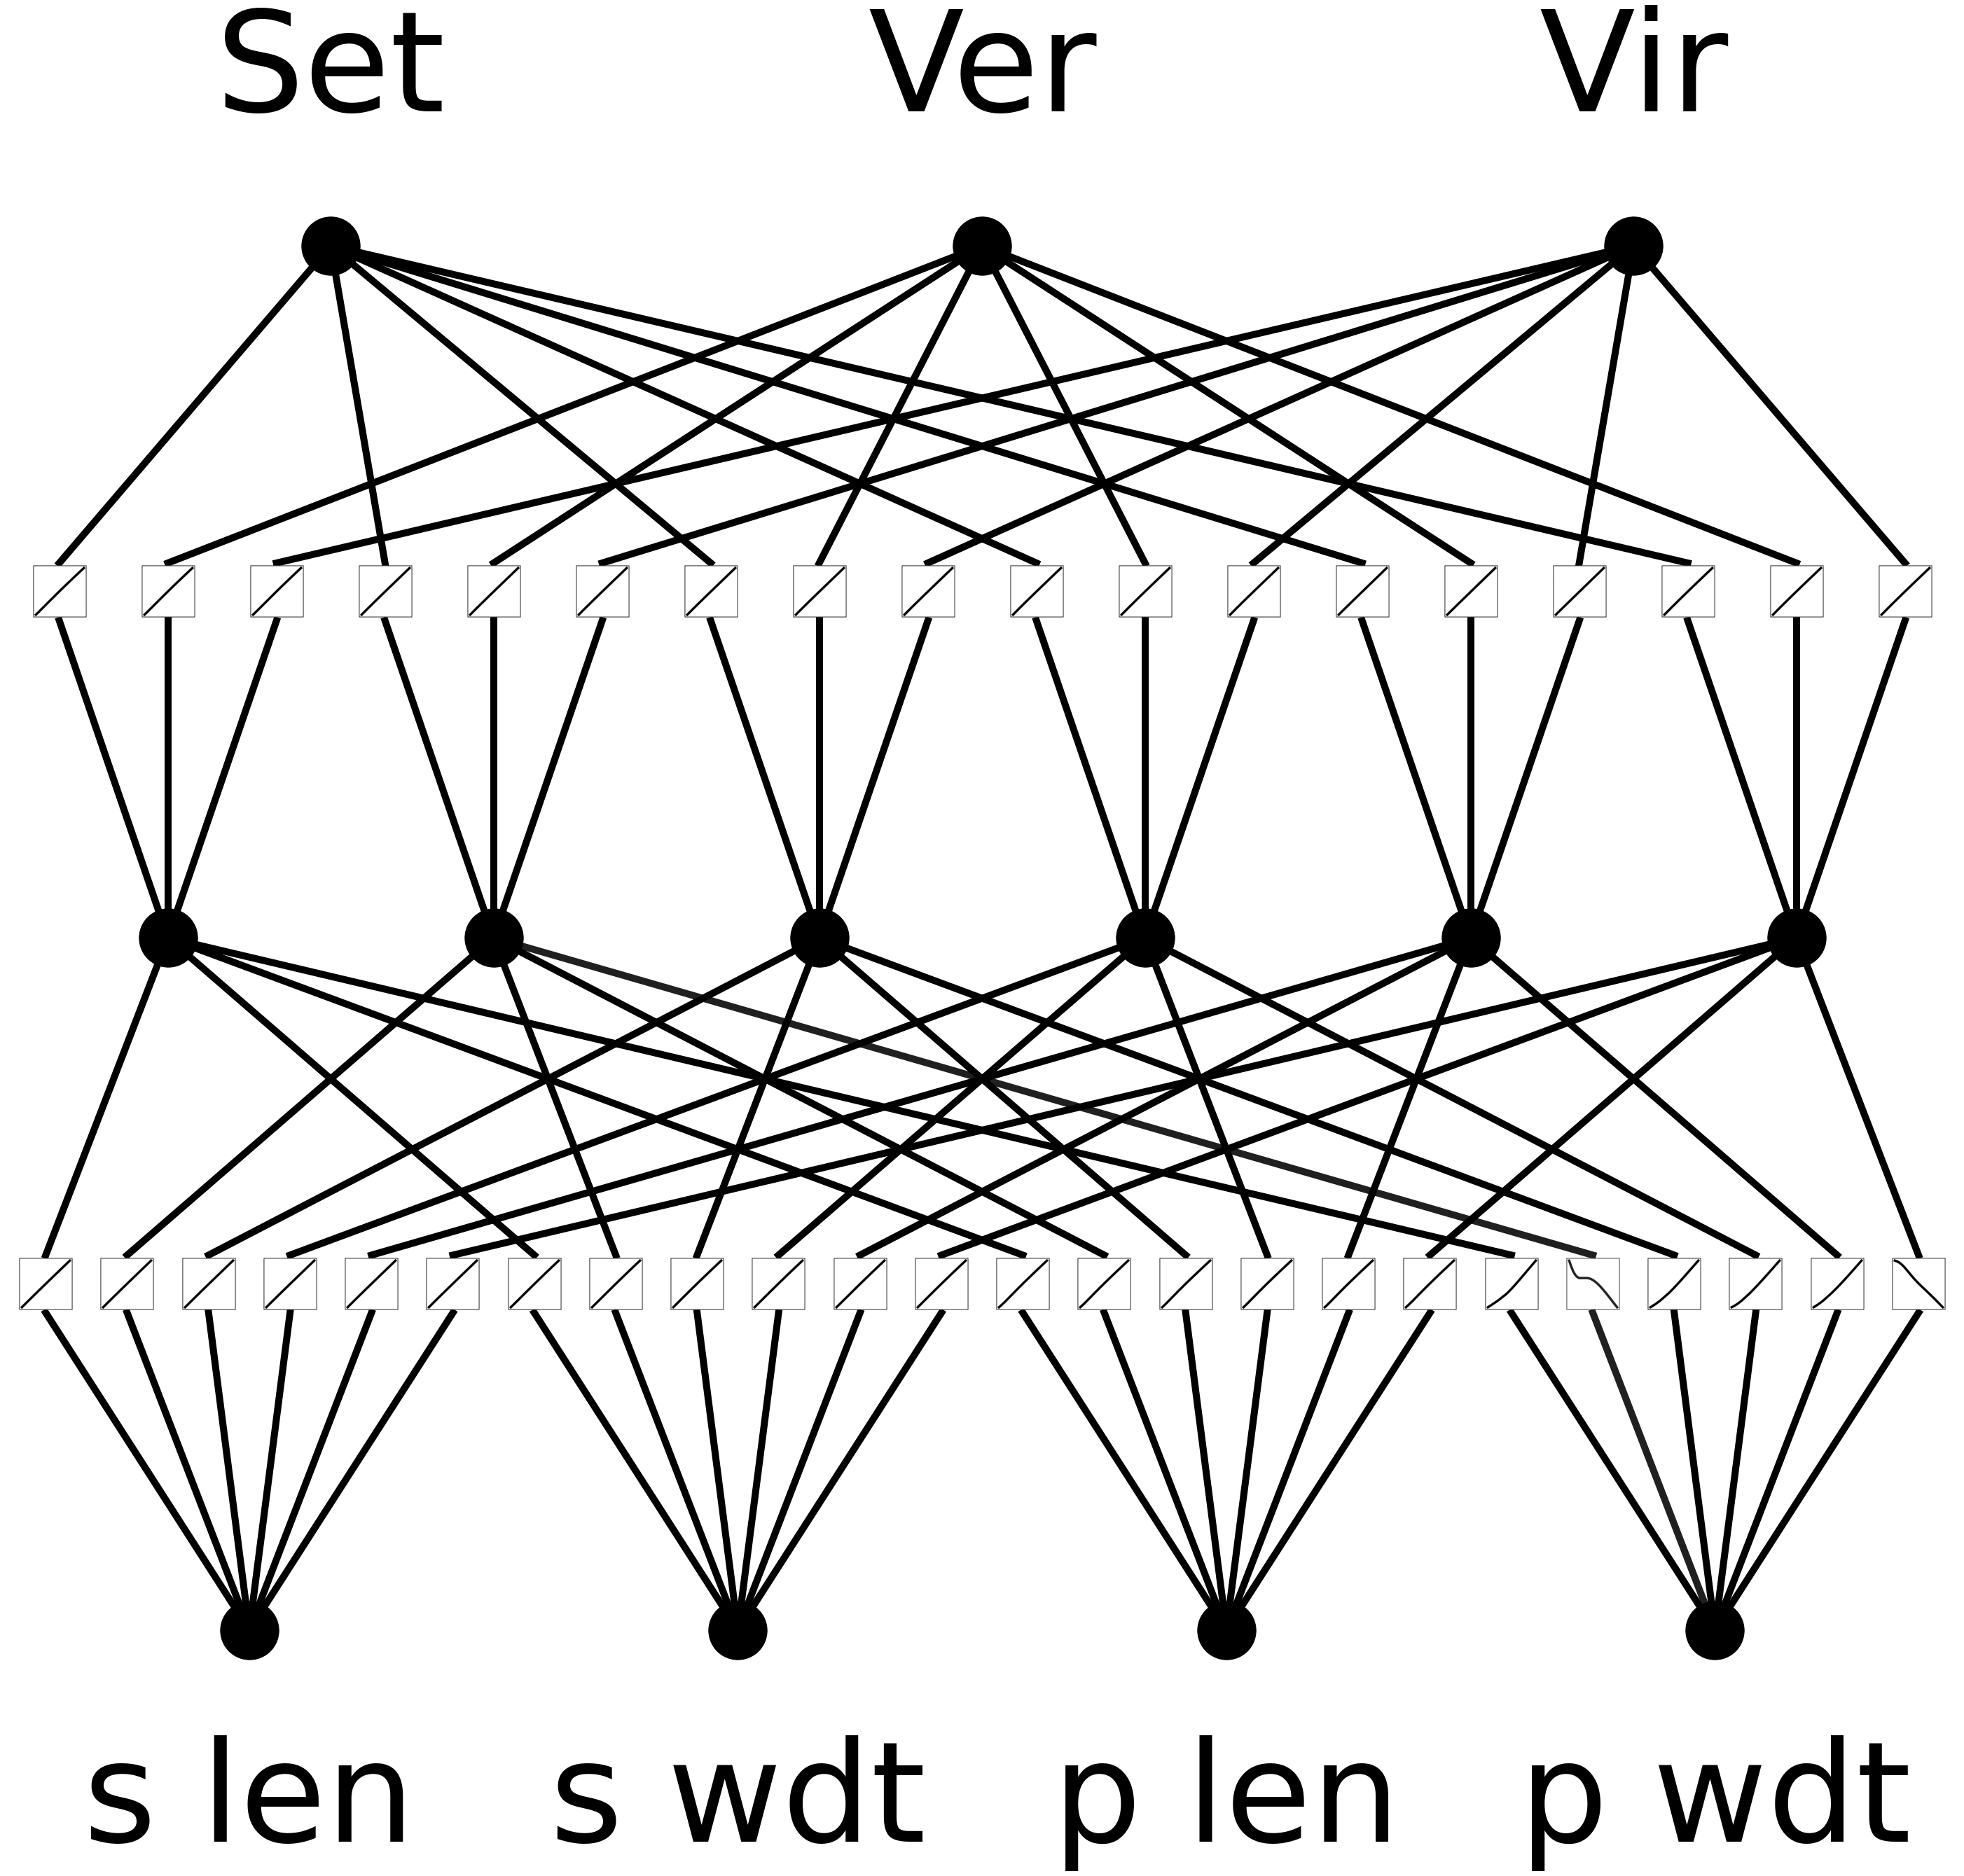

In [39]:
model = KAN(width=[4, 6, 3], grid=3, k=3, seed=0, device=device)

model(dataset['train_input'])

model.plot(beta=100, scale=1, in_vars=features, out_vars=classes)

In [40]:
def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

In [41]:
results = model.train(dataset, opt="Adam", device=device, metrics=(train_acc, test_acc),
                      loss_fn=torch.nn.CrossEntropyLoss(), steps=100, lamb=0.01, lamb_entropy=10., save_fig=False)
     

train loss: 1.27e-01 | test loss: 5.02e-01 | reg: 1.77e+02 : 100%|█| 100/100 [00:05<00:00, 17.02it/s


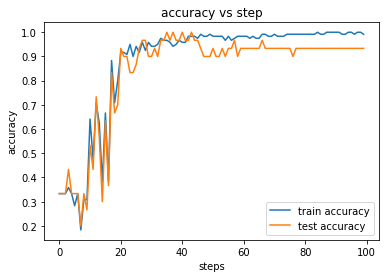

Text(0, 0.5, 'loss')

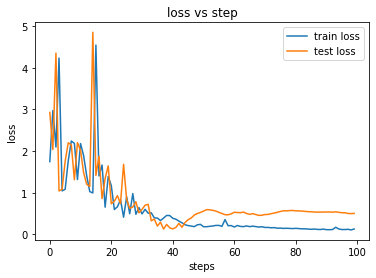

In [54]:
plt.plot(results['train_acc'], label='train accuracy')
plt.plot(results['test_acc'], label = 'test accuracy')
plt.legend()
plt.title('accuracy vs step')
plt.xlabel('steps')
plt.ylabel('accuracy')
plt.show()

plt.plot(results['train_loss'], label='train loss')
plt.plot(results['test_loss'], label = 'test loss')
plt.legend()
plt.title('loss vs step')
plt.xlabel('steps')
plt.ylabel('loss')

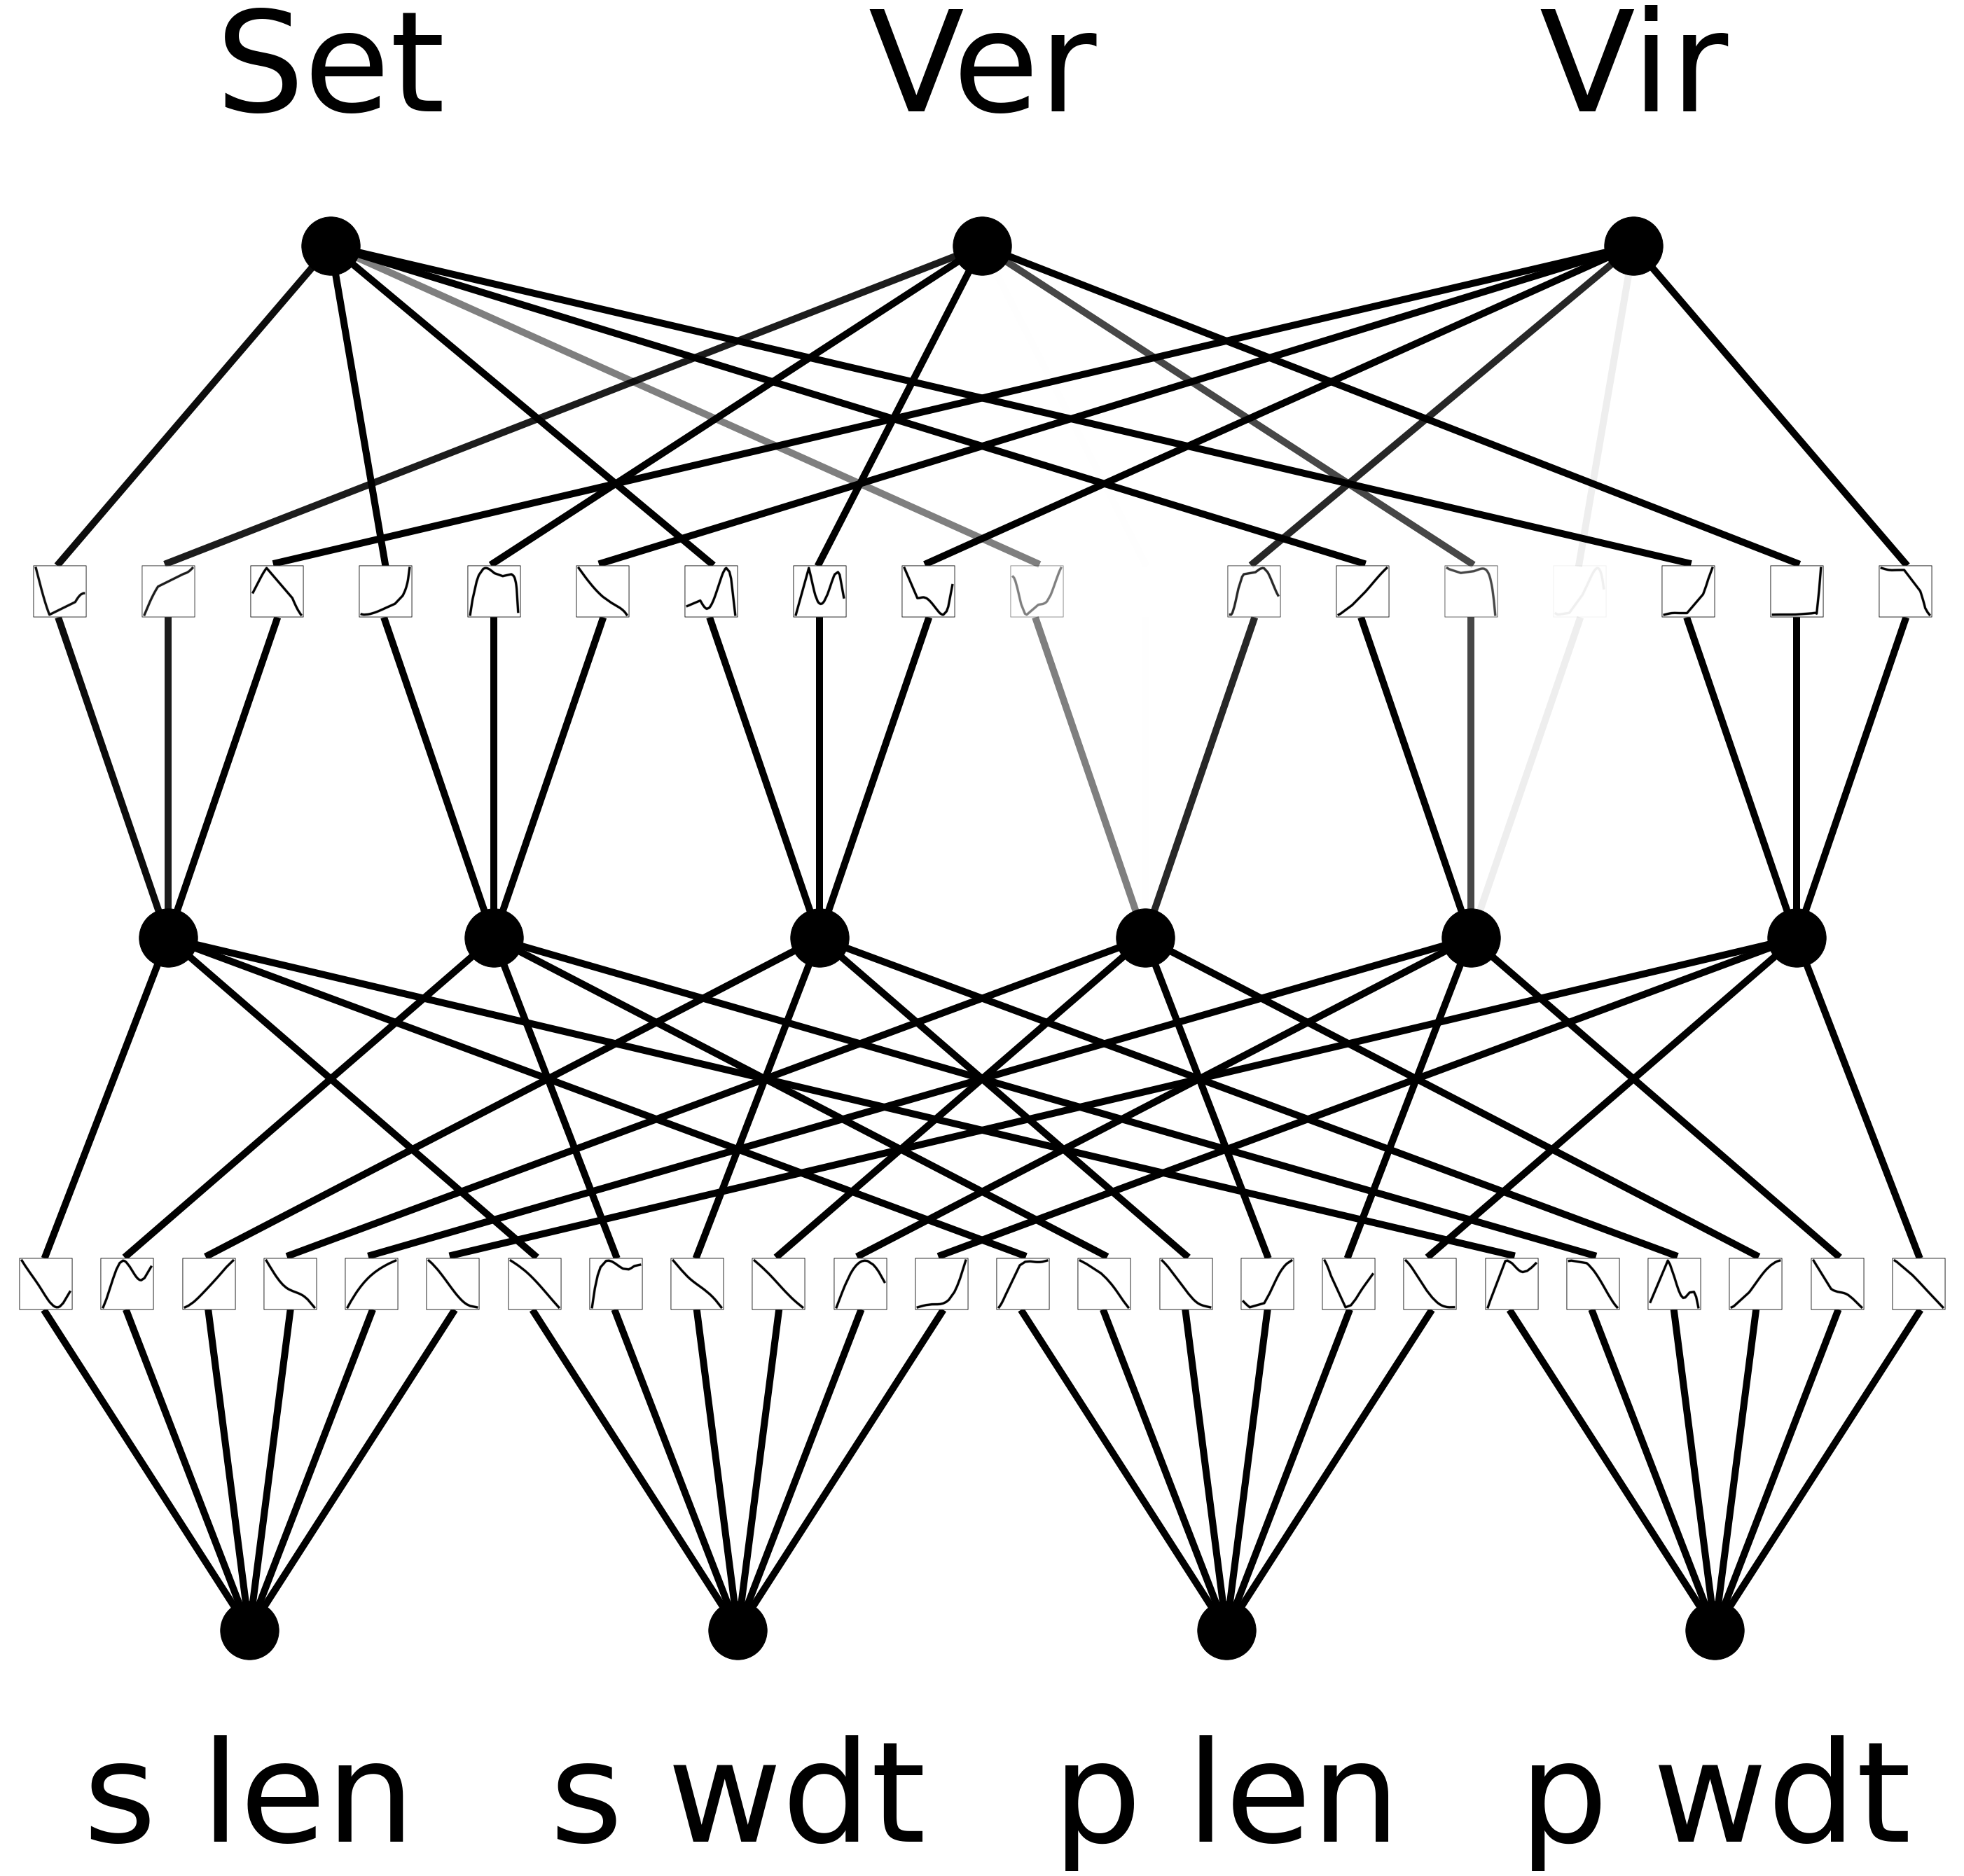

In [49]:
model.plot(beta=100, scale=1, in_vars=features, out_vars=classes)

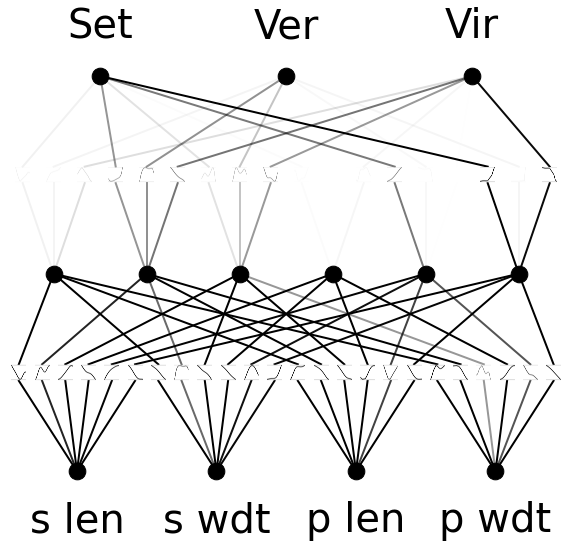

In [55]:
model = model.prune()
model(dataset['train_input'])
model.plot(scale=1, in_vars=features, out_vars=classes)